<a href="https://colab.research.google.com/github/Frankensosege/Tatanic-Competition/blob/main/Titanic_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [4]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [5]:
# abstract Survived column as train target 
train_target = train_df['Survived']

# concat train data & test data for data pre processing
titanic_all = pd.concat([train_df.drop(['Survived'], axis=1), test_df])
print(titanic_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB
None


# Data analisys</p>
1. draw sum of survivers vs. each data columns for determin what columns to use, to drop, to convert</p>
It is not so clear if there are some correlations between columns like Name, Ticket, Fare, Cabin comparatively other columns as presented below graphs, but graphs are shown absolutely surviver are correlated with Sex, Age, Sibsp, Parch and Embarked.</p>
And there is needs to leveling that has clear correlations but has so distributed widly

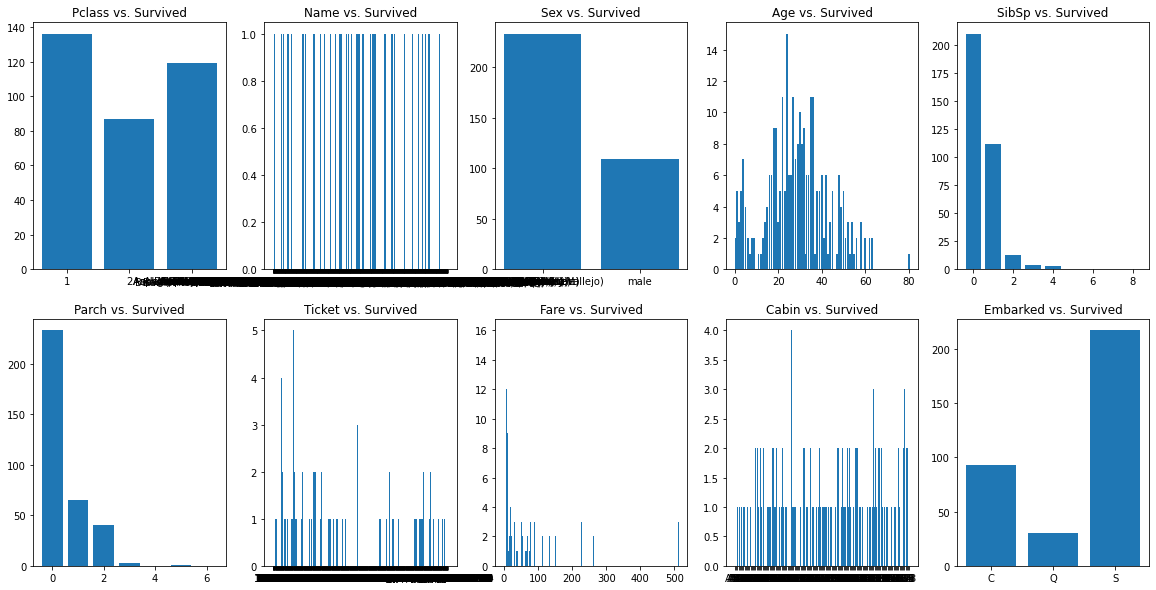

In [6]:
clos  = test_df.columns
fig = plt.figure(figsize=(20, 10))

axe = []
idx = 0

# To draw each columns data divide grphical area to 2 by 5, group by each columns and sum 'Suvived' column
for col in clos:
  if col == 'PassengerId':
    continue
  grouped = train_df[[col, 'Survived']].groupby([col]).agg('sum')
  axe.append(fig.add_subplot(2, 5, idx + 1))
  axe[idx].bar(grouped.index.to_list(), grouped['Survived'])
  axe[idx].set_title(col + ' vs. Survived')
  idx += 1


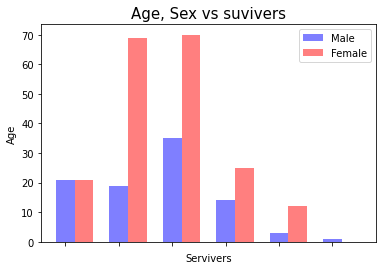

In [103]:
agegroup_vs_survive = train_df[['Age', 'Sex', 'Survived']].copy()

agegroup_vs_survive['AgeBand'] = pd.cut(agegroup_vs_survive['Age'], 6)
grouped = agegroup_vs_survive[['AgeBand', 'Sex', 'Survived']].groupby(['AgeBand', 'Sex'], as_index=False).sum().sort_values(by='AgeBand', ascending=True)

new_idx = ['0~14', '15~27', '28~40', '41~54', '54~67', '68~80']

df_age_men_suv = grouped[grouped['Sex']=='male']
df_age_men_suv = df_age_men_suv.rename(columns={'Survived':'male'})
df_age_men_suv.set_index(keys='AgeBand', inplace=True)

df_age_women_suv = grouped[grouped['Sex']=='female']
df_age_women_suv = df_age_women_suv.rename(columns={'Survived':'female'})
df_age_women_suv.set_index(keys='AgeBand', inplace=True)

df_merged = pd.merge(left=df_age_men_suv, right=df_age_women_suv, left_index = True, right_index = True, how = 'outer')
df_merged['new_idx'] = new_idx
df_merged.set_index(keys='new_idx', inplace=True)
df_merged.drop(['Sex_x', 'Sex_y'], axis=1, inplace=True)

bar_width = 0.35
alpha = 0.5
index = np.arange(len(new_idx))

p1 = plt.bar(index, df_merged['male'], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label='Male')

p2 = plt.bar(index + bar_width, df_merged['female'], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label='Female')

plt.title('Age, Sex vs suvivers', fontsize=15)
plt.ylabel('Age')
plt.xlabel('Servivers')
plt.xticks(index, '')
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=10)

plt.show()

In [ ]:
mask = test_df['Fare'].isnull()

print(test_df[mask])

     PassengerId  Pclass                Name   Sex   Age  SibSp  Parch Ticket  \
152         1044       3  Storey, Mr. Thomas  male  60.5      0      0   3701   

     Fare Cabin Embarked  
152   NaN   NaN        S  


In [ ]:
test_df[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Fare
0,1,94.280297
1,2,22.202104
2,3,12.459678


In [ ]:
test_df.loc[152, 'Fare'] = 12.459678

In [ ]:
train_pri_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
train_pri_df.fillna(value={'Age':0, 'Fare':0}, inplace=True)
test_df.fillna(value={'Age':0, 'Fare':0}, inplace=True)

# age_group = train_pri_df.groupby(['Pclass', 'Sex', 'SibSp', 'Parch'])
age_group = train_pri_df.groupby(['Pclass', 'Sex'])
age_mid = age_group.Age.median()
age_std = age_group.Age.std()

# print(age_mid.loc[3, 'male', 8, 2])
# print(age_std.loc[3, 'male', 8, 2])

# print(age_group.get_group((3, 'male', 1, 5)))

# age_group2 = train_pri_df.groupby(['Pclass', 'Sex'])
# age_mid2 = age_group2.Age.median()
# age_std2 = age_group2.Age.std()

# max_parch = train_pri_df['Parch'].max()
# max_sibsp = train_pri_df['SibSp'].max()

In [ ]:


def guess_age(line):
  # sibsp = line['SibSp'] if line['SibSp'] <= max_sibsp else max_sibsp
  # parch = line['Parch'] if line['Parch'] <= max_parch else max_parch
  # agm = age_mid.loc[(line['Pclass'], line['Sex'], sibsp, parch)]
  # ags = age_std.loc[(line['Pclass'], line['Sex'], sibsp, parch)]
  # if agm == 0.0 or np.isnan(ags):
  #   agm = age_mid2.loc[(line['Pclass'], line['Sex'])]
  #   ags = age_std2.loc[(line['Pclass'], line['Sex'])]
  # print(line['PassengerId'], line['Pclass'], line['Sex'], line['SibSp'], line['Parch'], agm, ags)
  agm = age_mid.loc[(line['Pclass'], line['Sex'])]
  ags = age_std.loc[(line['Pclass'], line['Sex'])]

  age_guess =  round(random.uniform(agm - ags, agm + ags))
  # print(line['PassengerId'], age_guess)
  # if age_guess == np.nan:
  #   print(line['Pclass'], line['Sex'], line['SibSp'], line['Parch'], agm, ags)
  
  return age_guess
    

In [ ]:
for idx, row in train_pri_df.iterrows():
  if row['Age'] == 0.0:
    train_pri_df.loc[idx, 'Age'] = guess_age(row)

for idx, row in test_df.iterrows():
  if row['Age'] == 0.0:
    test_df.loc[idx, 'Age'] = guess_age(row)

train_pri_df.info()
test_df.info()

10 22 29 33 36 39 41 47 54 58 65 76 83 84 85 88 91 93 102 107 108 111 116 121 124 127 132 133 146 148 151 160 163 168 170 173 183 188 191 199 200 205 211 216 219 225 227 233 243 244 249 255 256 265 266 267 268 271 273 274 282 286 288 289 290 292 297 301 304 312 332 339 342 344 357 358 365 366 380 382 384 408 410 413 416 417 <class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 n

In [ ]:
print(train_pri_df.head())
print(train_pri_df.tail())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

In [ ]:
train_pri_df['AgeBand'] = pd.cut(train_pri_df['Age'], 5)
train_pri_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.467949
1,"(16.336, 32.252]",0.359447
2,"(32.252, 48.168]",0.375000
3,"(48.168, 64.084]",0.418919
4,"(64.084, 80.0]",0.090909


In [ ]:
train_pri_df['AgeBand'] = pd.cut(train_pri_df['Age'], 6)
train_pri_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 13.683]",0.508929
1,"(13.683, 26.947]",0.336420
2,"(26.947, 40.21]",0.400685
3,"(40.21, 53.473]",0.380531
4,"(53.473, 66.737]",0.348837
5,"(66.737, 80.0]",0.142857


In [ ]:
def get_age_class(age):
  if age <= 14:
    ret_agg = 0
  elif 14 < age <= 27:
    ret_agg = 1
  elif 27 < age <= 40:
    ret_agg = 2
  elif 40 < age <= 53:
    ret_agg = 3
  elif 53 < age <= 67:
    ret_agg = 4
  else:
    ret_agg = 5
  return ret_agg


In [ ]:
train_pri_df['Age'] = train_pri_df.apply(lambda x:get_age_class(x['Age']), axis=1)
print(train_pri_df.head())
test_df['Age'] = test_df.apply(lambda x:get_age_class(x['Age']), axis=1)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch            Ticket     Fare Cabin Embarked           AgeBand  
0      0         A/5 21171   7.2500   NaN        S  (13.683, 26.947]  
1      0          PC 17599  71.2833   C85        C   (26.947, 40.21]  
2      0  STON/O2. 3101282   7.9250   NaN        S  (13.683, 26.947]  
3      0            113803  53.1000  C123 

In [ ]:
train_pri_df['FareBand'] = pd.qcut(train_pri_df['Fare'], 4)
train_pri_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
def get_fare_class(fare):
  if fare <= 7.91:
    ret_class = 0
  elif 7.91 < fare <= 14.454:
    ret_class = 1
  elif 14.454 < fare <= 31:
    ret_class = 2
  else:
    ret_class = 3
  return ret_class

In [ ]:
train_pri_df['Fare'] = train_pri_df.apply(lambda x:get_fare_class(x['Fare']), axis=1)
test_df['Fare'] = test_df.apply(lambda x:get_fare_class(x['Fare']), axis=1)
print(train_pri_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch            Ticket  Fare Cabin Embarked           AgeBand  \
0      0         A/5 21171     0   NaN        S  (13.683, 26.947]   
1      0          PC 17599     3   C85        C   (26.947, 40.21]   
2      0  STON/O2. 3101282     1   NaN        S  (13.683, 26.947]   
3      0            113803     3  C123        S   

In [ ]:
train_pri_df['FamilySize'] = train_pri_df['SibSp'] +  train_pri_df['Parch'] + 1
test_df['FamilySize'] = train_pri_df['SibSp'] +  train_pri_df['Parch'] + 1
train_pri_df[['FamilySize', 'Sex', 'Survived']].groupby(['FamilySize', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Sex,Survived
6,4,female,0.842105
2,2,female,0.816092
0,1,female,0.785714
4,3,female,0.775510
7,4,male,0.500000
5,3,male,0.396226
10,6,female,0.375000
12,7,female,0.375000
8,5,female,0.250000
13,7,male,0.250000


In [ ]:
def suv_famsize(fam_size, sex):
  if 2 <= fam_size < 5:
    if sex == 0:
      return 2
    else:
      return 3
  elif fam_size == 1 and sex == 1:
    return 3
  else:
    if sex == 0:
      return 1
    else:
      return 0


In [ ]:
train_pri_df['FamilySize'] = train_pri_df.apply(lambda x:suv_famsize(x['FamilySize'], x['Sex']), axis=1)
test_df['FamilySize'] = test_df.apply(lambda x:suv_famsize(x['FamilySize'], x['Sex']), axis=1)
print(train_pri_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch            Ticket  Fare Cabin Embarked           AgeBand  \
0      0         A/5 21171     0   NaN        S  (13.683, 26.947]   
1      0          PC 17599     3   C85        C   (26.947, 40.21]   
2      0  STON/O2. 3101282     1   NaN        S  (13.683, 26.947]   
3      0            113803     3  C123        S   

In [ ]:
freq_port = train_pri_df.Embarked.dropna().mode()[0]
train_pri_df.fillna(value={'Embarked':'S'}, inplace=True)
train_pri_df['Embarked'] = train_pri_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_pri_df.head()

test_df.fillna(value={'Embarked':'S'}, inplace=True)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
df_pivot = pd.pivot_table(train_pri_df,
                    index=['Pclass', 'Sex', 'SibSp', 'Parch'],
                    columns='AgeBand',
                    values=['Survived'],
                    aggfunc=['mean'])
df_pivot

mean                                   \
                                Survived                                    
AgeBand                   (0.34, 13.683] (13.683, 26.947] (26.947, 40.21]   
Pclass Sex    SibSp Parch                                                   
1      female 0     0                NaN              1.0             1.0   
                    1                NaN              1.0             NaN   
                    2                NaN              1.0             1.0   
              1     0                NaN              1.0             1.0   
                    1                NaN              NaN             1.0   
...                                  ...              ...             ...   
3      male   3     1           0.000000              NaN             NaN   
                    2           0.000000              NaN             NaN   
              4     1           0.000000              0.0             NaN   
                    2           0.333333              NaN             NaN   
              5     2           0.000000              0.0             NaN   

                                                                           
                                                                           
AgeBand                   (40.21, 53.473] (53.473, 66.737] (66.737, 80.0]  
Pclass Sex    SibSp Parch                                                  
1      female 0     0            0.833333              1.0            NaN  
                    1            1.000000              1.0            NaN  
                    2                 NaN              NaN            NaN  
              1     0            1.000000              1.0            NaN  
                    1            1.000000              NaN            NaN  
...                                   ...              ...            ...  
3      male   3     1                 NaN              NaN            NaN  
                    2                 NaN              NaN            NaN  
              4     1                 NaN              NaN            NaN  
                    2                 NaN              NaN            NaN  
              5     2                 NaN              NaN            NaN  

[71 rows x 6 columns]

In [ ]:
age_group = train_pri_df.groupby(['AgeBand', 'Pclass'])
print(age_group.PassengerId.count())

AgeBand           Pclass
(0.34, 13.683]    1           4
                  2          18
                  3          49
(13.683, 26.947]  1          40
                  2          49
                  3         159
(26.947, 40.21]   1          66
                  2          72
                  3         107
(40.21, 53.473]   1          45
                  2          22
                  3          33
(53.473, 66.737]  1          27
                  2          11
                  3           5
(66.737, 80.0]    1           4
                  2           1
                  3           2
Name: PassengerId, dtype: int64


In [ ]:
train_pri_df['Title'] = train_pri_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_pri_df['Title'], train_pri_df['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
def retitle(title):
  if title in ('Lady', 'Countess', 'Don', 'Rev', 'Sir', 'Jonkheer', 'Dona'):
    return 'noble'
  elif title in ('Capt', 'Col', 'Major'):
    return 'soldier'
  elif title in ('Mlle', 'Ms'):
    return 'Miss'
  elif title == 'Mme':
    return 'Mrs'
  else:
    return title

In [ ]:
train_pri_df['Title'] = train_pri_df.apply(lambda x:retitle(x['Title']), axis=1)
print(train_pri_df.head())
test_df['Title'] = test_df.apply(lambda x:retitle(x['Title']), axis=1)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch            Ticket  Fare Cabin  Embarked           AgeBand  \
0      0         A/5 21171     0   NaN         0  (13.683, 26.947]   
1      0          PC 17599     3   C85         1   (26.947, 40.21]   
2      0  STON/O2. 3101282     1   NaN         0  (13.683, 26.947]   
3      0            113803     3  C123        

In [ ]:
train_pri_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
4,Mrs,0.793651
2,Miss,0.702703
1,Master,0.575000
0,Dr,0.428571
6,soldier,0.400000
5,noble,0.272727
3,Mr,0.156673


In [ ]:
title_mapping = {"Mr": 1, "noble": 2, "soldier": 3, "Dr": 4, "Master": 5, 'Miss':6, 'Mrs':7}
train_pri_df['Title'] = train_pri_df['Title'].map(title_mapping)
train_pri_df.fillna(value={'Title':0}, inplace=True)

test_df['Title'] = test_df['Title'].map(title_mapping)
test_df.fillna(value={'Title':0}, inplace=True)

In [ ]:
train_pri_df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'AgeBand', 'FareBand'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

train_pri_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Pclass       891 non-null    int64 
 2   Sex          891 non-null    object
 3   Age          891 non-null    int64 
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Fare         891 non-null    int64 
 7   Embarked     891 non-null    int64 
 8   FamilySize   891 non-null    int64 
 9   Title        891 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Sex          418 non-null    object
 3   Age          418 non-null    int64 
 

In [ ]:
train_pri_df['Sex'] = train_pri_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

In [ ]:
print(train_pri_df.head())

   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  \
0            1       3    1    1      1      0     0         0           3   
1            2       1    0    2      1      0     3         1           3   
2            3       3    0    1      0      0     1         0           0   
3            4       1    0    2      1      0     3         0           3   
4            5       3    1    2      0      0     1         0           0   

   Title  
0      1  
1      7  
2      6  
3      7  
4      1  


Mean accuracy of KNeibor :71.49 %
Mean accuracy of Perceptron :54.76 %
Mean accuracy of SFDClassifire :59.48 %
Mean accuracy of D_tree :74.30 %
Mean accuracy of RF :80.69 %
Mean accuracy of GNB :81.60 %
Mean accuracy of KNN :69.02 %
Mean accuracy of Ada :82.03 %
Mean accuracy of QDA :61.62 %
Mean accuracy of SVM_l :80.13 %
Mean accuracy of SVM_k :80.59 %


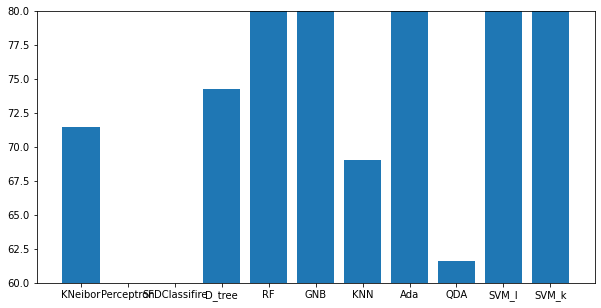

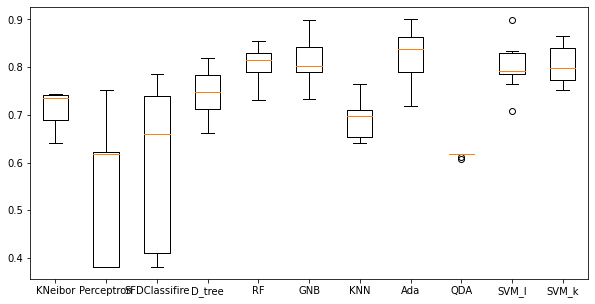

In [ ]:


classifiers = [KNeighborsClassifier(n_neighbors = 3),
               Perceptron(),
               SGDClassifier(),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               GaussianNB(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis(),
               VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                            ('2', RandomForestClassifier()),
                                            ('3', SVC(kernel='linear'))])]
classifier_names = ['KNeibor',
                    'Perceptron',
                    'SFDClassifire',
                    'D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_l',
                    'SVM_k']
modelaccuraies=[]
modelmeans=[]
modelnames=[]

classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
  skf = StratifiedKFold(n_splits=10, shuffle=True)
  accuracies = cross_val_score(classifier, X=train_pri_df, y=train_target, cv=skf)
  print("Mean accuracy of", classifier_name, ":{:.2f} %".format(accuracies.mean()*100))
  modelaccuraies.append(accuracies)
  modelmeans.append(accuracies.mean()*100)
  modelnames.append(classifier_name)

plt.figure(figsize=(10,5))
plt.ylim([60, 80])
plt.bar(modelnames, modelmeans)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuraies)
ax.set_xticklabels(modelnames)
plt.show()

In [ ]:
abc = AdaBoostClassifier()
abc.fit(train_pri_df, train_target)

AdaBoostClassifier()

In [ ]:
print(abc.score(train_pri_df, train_target))

0.8294051627384961


In [ ]:
Y_pred = abc.predict(test_df)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission.csv', index=False)